# Project 1: Image Processing

## Section 1: Multi-Class Image Classification

### Introduction

Computer vision (CV) is a field of Artificial Intelligence which aims to enable computers to process, understand and interpret visual information. Computer vision involves a range of tasks, such as image classification, object detection, and image segmentation.

In this section, we focus on image classification. In this task, we are given an image, and we must say which object is in the image (e.g. a car, a plane, a horse,...). We solve this task by training a convolutional neural network (CNN). We train this network on a dataset of 60,000 images, where each image contains either a plane, a car, a bird, a cat, a deer, a dog, a frog, a horse, a ship, or a truck. After training, the CNN is able to recognize the object in the image with 72% accuracy.

More precisely, we learn the following:

* How to specify the architecture of a CNN model.
* How to preprocess images to feed them into a convolutional neural network (CNN).
* How to build, train and evaluate a CNN model for a multi-class image classification.
* How to choose hyperparameters for CNNs.

### Architecture of a CNN



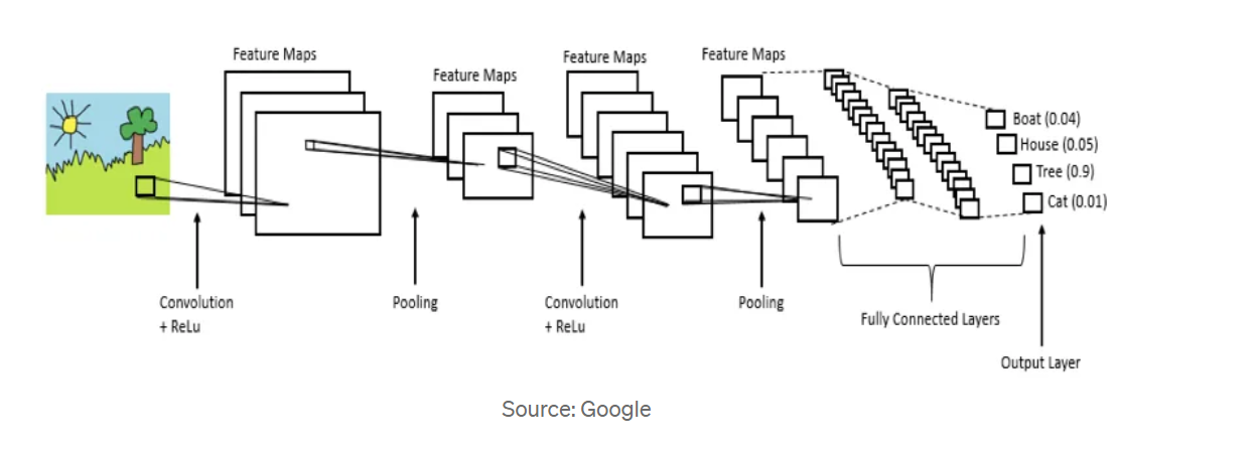

The figure above describes the typical architecture of a CNN. It consists of the following:

**Input layer** This is the layer in charge of reading the image.

**Convolutional layers** They apply filters to the input image in order to detect patterns and generate feature maps. The filter slides over the input image and performs element-wise multiplication and summation to generate feature maps. Deeper convolutional layers learn to detect more complex features and patterns by building upon the feature maps learned in the previous layers.

**Activation functions** After a convolutional layer, there is an activation layer, where an activation function like the ReLU is applied. The result is called a feature map.

**Pooling layers** This layer compresses feature maps in their size.

**Fully connected layers** After several convolutional, activation, and pooling layers, there is a sequence of fully connected layers.

**Output layer** This is the last layer where the predictions are produced. In our case, we want to recognize one of 10 possible objects in the image. Therefore, we have 10 neurons in this last layer. Each neuron produces a score quantifying the likelihood that a particular object is in the image.


### The dataset

To train a CNN we need data. For our case, we use the popular CIFAR-10 dataset. It is a collection of images divided into 10 classes: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck. Each class has  6,000 images of a particular object, so there are 60,000 images in this dataset. The dataset is divided into two datasets. One dataset for training with 50,000 images and the other for testing with 10,000 images.  This [link](https://www.cs.toronto.edu/~kriz/cifar.html) has more information on CIFAR-10.

Each image is 32×32 pixels in size. Furthermore, each pixel consists of 3 values: one defining the red intensity, another for the green intensity, and another for the blue intensity. Note then that each image is described by 32 x 32 x 3 numbers.

In general, images are represented as 3 tables, one describing the red intensities, another describing the blue intensities, and another describing the green intensities. One can obtain any color by combining red, blue, and green in a specific way. The figure below illustrates this.

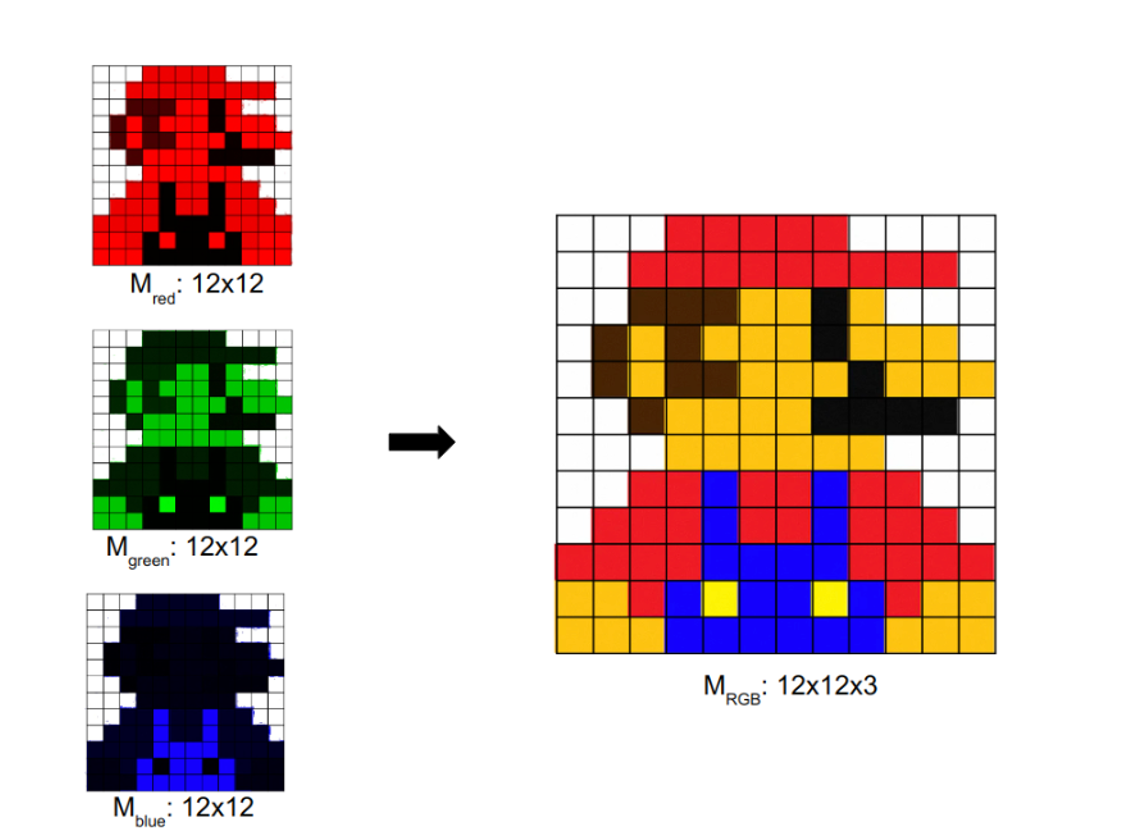

Note how the pixelated Mario on the right is the result of mixing three pixelated Marios, one in different tones of red, another in different tones of green, and another in different tones of blue.

Each of the pixelated Marios on the left is described as a table of values. So images in computers are represented by three tables of values.

In the rest of this section, we present the code to train the CNN. We present three different CNNs.


### CNN 1

We start with a simple CNN. Training CNN requires GPU power. If you are using RenkuLab, your environment should already have access to a GPU and no further action is needed. If you are in Colab, you must request GPU power as follows:

1. Go to Runtime at the top of your Colab notebook.

2. Go to "change runtime type".

2. Choose T4GPU and then press Save.

We now import libraries that will be useful for this project:

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

TensorFlow is an end-to-end machine learning framework. For more information, please click on https://www.tensorflow.org/

We now download the CIFAR dataset with the following command

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()


Note how this command already divides the dataset into training and testing datasets. The training part is stored in `X_train, y_train` and the testing part is stored in `X_test, y_test`.

We can now plot the first five images in the dataset with the following commands:

In [ ]:
import matplotlib.pyplot as plt

plt.subplot(1, 5, 1)
plt.imshow(X_train[1])
plt.subplot(1, 5, 2)
plt.imshow(X_train[2])
plt.subplot(1, 5, 3)
plt.imshow(X_train[3])
plt.subplot(1, 5, 4)
plt.imshow(X_train[4])
plt.subplot(1, 5, 5)
plt.imshow(X_train[5])

With `plt.subplot`, you can draw multiple plots in one figure. The command `plt.subplot(1, 5, 1)` says that we will create the first of five plots. It also says that they should be accommodated in 1 row and 5 columns. The command `plt.imshow(X_train[1])` plots `X_train[1]`, the image 1 from the training dataset, on a 2D regular raster.

#### Preprocessing the images

We now preprocess the images. Recall that images are stored in computers as tables of numbers. Each number is between 0 and 255. However, the algorithms for training CNNs require these values to be between 0 and 1. To solve this, we scale all values in the images with the following commands:


In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0

We also need to do a preprocessing of the labels. We do not explain how this is done here, as this involves technical details out of the scope of the course. This preprocessing is done through the following commands:

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train,)
y_test = tf.keras.utils.to_categorical(y_test)


### Defining the architecture

We now specify the components of the CNN with the following commands:

**Model creation** We create the model with the following command


In [ ]:
model_base = tf.keras.Sequential(name="model_base")

This creates an empty CNN and stores it in `model_base`. `Sequential` is a way to specify a model - it will allow us to sequentially add layers. Optionally, we also pass a parameter giving a name to the model.

The input size is 32x32x3

In [ ]:
model_base.add(Input((32,32,3)))

**Adding a convolutional layer** We add a convolutional layer consisting of 16 filters. Each filter has dimensions 3x3. The input size is 32x32x3; this is because each image has 32x32 pixels and each pixel has 3 numbers. We use the ReLU as an activation.

In [ ]:
model_base.add(Conv2D(16,(3,3) ,activation='relu'))

**Adding a pooling layer** We add a max-pooling layer, where the pooling filter has dimensions 2x2.


In [ ]:
model_base.add(MaxPooling2D(pool_size = (2,2)))

**Adding another convolutional layer** This layer consists of 16 filters, each of size 4x4.


In [ ]:
model_base.add(Conv2D(16,(4,4), activation='relu'))

**Adding another pooling layer** We add another max-pooling layer.


In [ ]:
model_base.add(MaxPooling2D(pool_size = (2,2)))

**Change to a fully-connected network** We now add a layer that helps to transition to fully-connected layers.

In [ ]:
model_base.add(Flatten())

**Adding a layer with 16 neurons** We now add a layer with 16 neurons.

In [ ]:
model_base.add(Dense(16, activation ='relu'))

**Adding a layer with 10 neurons** We finally add a last layer with 10 neurons. We use 10 neurons because we want to recognize 10 different objects. Here we use the softmax function as the activation function.


In [ ]:
model_base.add(Dense(10, activation ='softmax'))

We can display all information about the CNN with the command below. We can also see the number of parameters of the model.

In [ ]:
model_base.summary()

#### Compiling the model

We must now compile this model. For this, we need to define the loss function that will be used during training, the training algorithm, and an evaluation metric to validate the trained CNN. We can do this with the command below.


In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001)
model_base.compile(loss='categorical_crossentropy',
                   optimizer=optimizer,
                   metrics=['accuracy'])

The categorical cross-entropy loss is a popular loss function used for classification. Adam is a popular training algorithm for neural networks. The accuracy measures the percentage of images correctly classified and is also a popular evaluation metric.

#### Technical remarks (optional)

* The optimizer `adam` contributes to minimising the difference between the actual labels and predicted probabilities by updating and adjusting the model’s parameters, that is, the weights. The weights control the strength of the connection between two neurons. In other words, they control how much influence one neuron will have on the other.
* The categorical cross-entropy is used because we have different labels to predict. The cross-entropy compares the true (actual) labels to the predicted probabilities for each label that the model has given.  
* The accuracy metrics will keep track of the accuracy values during training.


#### Training the CNN

The following command starts the training process:

In [ ]:
history_base = model_base.fit(X_train, y_train, epochs = 20, batch_size = 64 ,shuffle = True, validation_data=(X_test, y_test))

This trains your model for 20 epochs, which means that the model will go through the training dataset 20 times.

The training data is in the `X_train` and `y_train`. The model learns to associate the images (`X_train`) with the labels (`y_train`) during training. Then, the validation_data will be used for making inferences on the new, unseen images, in other words, the validation_data will be used to test how well the model predicts that a specific label (`y_test`) matches with a specific image (`X_test`).

Executing the command above produces a report. At the end, you see that the model achieved an accuracy on the training set (`accuracy`) of approx. 52%. This means that the model is able to correctly recognize the object in the image 52% of the time. Note that the accuracy on the testing set (`val_accuracy`) is approx 52%. This is important, because the testing set consists of images that were not used during training. This accuracy is more important because it reflects how capable the trained CNN is on recognizing objects in images that were not used for training.


#### Using the CNN

We can now use the trained CNN to recognize objects in the images from CIFAR-10. Suppose that we want to identify the object in the 7th image of the testing set. We can do this with the following commands:


In [ ]:
import numpy as np

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

test_image_index = 7

plt.imshow(X_test[test_image_index])

pred = np.argmax(model_base.predict(X_test[test_image_index].reshape(1, 32, 32, 3)))
print("Predicted Label: ", labels[pred])

### CNN 2 : Large (L)

We now train a more complex CNN. The code that defines this CNN’s architecture is below


In [ ]:
model_l = tf.keras.Sequential(name="model_l")
model_l.add(Conv2D(32,(3,3),input_shape = (32,32,3), padding = 'same', activation='relu'))
model_l.add(MaxPooling2D(pool_size=(2, 2)))

model_l.add(Conv2D(64,(4,4), padding ='same', activation='relu'))
model_l.add(MaxPooling2D(pool_size=(2, 2)))

model_l.add(Conv2D(64,(4,4), padding ='same', activation='relu'))
model_l.add(Flatten())

model_l.add(Dense(128, activation ='relu'))
model_l.add(Dense(128, activation ='relu'))

model_l.add(Dense(10, activation ='softmax'))

Let's look at the model summary. We can now see that the model has more than 40x the amount of parameters than our base model.

In [ ]:
model_l.summary()

Note how this CNN has more convolutional and fully connected layers.

The rest of this part is optional and describes some technical options that you can include when training your CNN.

**Compiling the CNN** You can add a learning rate to the Adam training algorithm. The learning rate determines the pace at which the model’s weights will be updated during training.

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001)
model_l.compile(loss='categorical_crossentropy',
               optimizer= optimizer,
               metrics=['accuracy'])

The learning rate can take on different values, from high to low (0.1, 0.005 etc.). If the learning rate is too high, the updates are larger, the convergence becomes faster and the training process becomes unstable while if it is too low, the updates are smaller, the convergence is slow and the training process might take longer. Both scenarios have disadvantages, thus it is suggested that you find the optimal learning rate for your model.

**Early stopping** The training of a CNN can lead to overfitting, where the CNN memorizes parts of the dataset and, therefore, fails to correctly work on images that are not in the training dataset. One mechanism to prevent this is early stopping. With this mechanism, the training algorithm is being monitored and the training will be stopped if there has been no improvement in the last `patience` many steps. The commands for using early stopping are the following:


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

earlyStopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3)

We set `min_delta` to 0.001 which means that the indicated `monitor` (in the example above: the validation accuracy) has to improve by at least 0.001 in order for it to be counted as improvement.

We set the EarlyStopping hyperparameter with a patience value of 3 which means that if the validation loss does not change in 3 epochs the model will stop training.

**Model training** We can integrate all the changes above into the training with the following command




In [ ]:
history_l = model_l.fit(X_train, y_train, epochs=20, shuffle = True, batch_size = 64, callbacks=[earlyStopping], validation_data=(X_test, y_test))

If you execute this command, you get a report about the training. At the end of this report you see that the accuracy in the testing (`val_accuracy`) set increased to 70% with this changes.


**Visualizing the accuracy and the loss** It is possible to produce plots that show the accuracy in training and testing datasets changes throughout training.


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))

plt.plot(history_l.history['accuracy'], label='Training Accuracy')
plt.plot(history_l.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.figure(figsize=(6, 4))
plt.plot(history_l.history['loss'], label='Training Loss')
plt.plot(history_l.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

### CNN 3 : Extra Large (XL)

We now present here a third CNN that we could train on our dataset. The CNN architecture is given by the following commands:

In [ ]:
model_xl = tf.keras.Sequential(name="model_xl")
model_xl.add(Conv2D(32,(3,3),input_shape = (32,32,3), padding = 'same', activation='relu'))
model_xl.add(MaxPooling2D(pool_size=(2, 2)))

model_xl.add(Conv2D(64,(4,4), padding ='same', activation='relu'))
model_xl.add(MaxPooling2D(pool_size=(2, 2)))

model_xl.add(Conv2D(128,(4,4), padding ='same', activation='relu'))
model_xl.add(MaxPooling2D(pool_size=(2, 2)))

model_xl.add(Conv2D(128,(4,4), padding ='same', activation='relu'))
model_xl.add(Flatten())

model_xl.add(Dense(1024, activation ='relu'))
model_xl.add(Dense(1024, activation ='relu'))
model_xl.add(Dense(1024, activation ='relu'))

model_xl.add(Dense(10, activation ='softmax'))


Again, we can look at the model summary. This model has 20x more parameters than our base model.

In [ ]:
model_xl.summary()

We now train this CNN

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001)
model_xl.compile(loss='categorical_crossentropy',
               optimizer= optimizer,
               metrics=['accuracy'])
history_xl = model_xl.fit(X_train, y_train, epochs=20,shuffle = True, batch_size = 64,  validation_data=(X_test, y_test))

We then visualize the accuarcy and the loss

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(history_xl.history['accuracy'], label='Training Accuarcy')
plt.plot(history_xl.history['val_accuracy'], label='Validation Accuary')
plt.title('Accuracy')
plt.legend()

plt.figure(figsize=(6, 4))

plt.plot(history_xl.history['loss'], label='Training Loss')
plt.plot(history_xl.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

From the graphs above, we can see that the model performed well on the training dataset, but it was unable to generalise well to new data since (a) the training accuracy increased and the validation accuracy plateaued and (b) the training loss decreased and the validation loss increased.

## Conclusion

In this section, we saw that by setting hyperparameters (epochs, batch size, early stopping, learning rate, padding) to our model, we can improve its performance. We also saw that it can happen for a model to achieve a high training accuracy score and at the same time to perform poorly on the testing dataset. Therefore, it is suggested that you compare the validation accuracy and validation loss scores with the training accuracy and loss scores.

Visualising the accuracy and loss curves helps you understand if your model is overfitting or underfitting, two concepts that you are going to learn in Section 2.


In [ ]:
# This code visualizes the loss of the three models (base, L, XL). You don't need to understand every detail of it

fig, axes = plt.subplots(1,3, layout = "tight", figsize=(8,3), sharex=True, sharey=True)

axes[0].plot(history_base.history['loss'], label='Training')
axes[0].plot(history_base.history['val_loss'], label='Validation')
axes[0].set_title('Base Model')
axes[0].legend()

axes[1].plot(history_l.history['loss'], label='Training')
axes[1].plot(history_l.history['val_loss'], label='Validation')
axes[1].set_title('L Model')
axes[1].legend()

axes[2].plot(history_xl.history['loss'], label='Training')
axes[2].plot(history_xl.history['val_loss'], label='Validation')
axes[2].set_title('XL Model')
axes[2].legend()

axes[0].set_ylabel('Loss')
axes[0].set_xlabel('Epoch')
axes[1].set_xlabel('Epoch')
axes[2].set_xlabel('Epoch')


In [ ]:
# This code visualizes the accuarcy of the three models (base, L, XL). You don't need to understand every detail of it

fig, axes = plt.subplots(1,3, layout = "tight", figsize=(8,3), sharex=True, sharey=True)

axes[0].plot(history_base.history['accuracy'], label='Training')
axes[0].plot(history_base.history['val_accuracy'], label='Validation')
axes[0].set_title('Base Model')
axes[0].legend()

axes[1].plot(history_l.history['accuracy'], label='Training')
axes[1].plot(history_l.history['val_accuracy'], label='Validation')
axes[1].set_title('L Model')
axes[1].legend()

axes[2].plot(history_xl.history['accuracy'], label='Training')
axes[2].plot(history_xl.history['val_accuracy'], label='Validation')
axes[2].set_title('XL Model')
axes[2].legend()

axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[1].set_xlabel('Epoch')
axes[2].set_xlabel('Epoch')

## Assessment

1. Download the CIFAR-100 dataset from the Keras library. You can download it using the following command `tf.keras.datasets.cifar100.load_data()`. Note that this is a dataset different from CIFAR-10. See more information [here](https://www.cs.toronto.edu/~kriz/cifar.html).
1. Split the data into training and testing sets.
1. Normalise the pixel values and one-hot encode the labels.
1. Compile, train and evaluate the model. Please note that the selection of hyperparameters as well as the size of the neural network is your own decision.
